## ProjF5 - Final Model

Use this document as a template to provide the evaluation of your final model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
print(len(df))
df.head()

192994


,Unnamed: 0,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,cleaned_review_stemmed,num_words,has_spoiler,has_plot twist
0,0,2013-07-16,tt0111161,ur34426359,True,Wow! what a film this baby is and yes this fil...,10,Great films come only once in a blue moon,wow film baby ye film one brilliant film ever ...,137,False,False
1,1,2013-07-02,tt0111161,ur30748387,True,"In 1947, banker Andy Dufresne (Tim Robbins) is...",10,Yes...,banker robbin murdering wife lover based circu...,697,False,False
2,2,2015-02-09,tt0111161,ur58506458,True,The Shawshank Redemption is a movie that creat...,10,The Best Movie of all Time,redemption movie create sense mystery power ro...,169,False,False
3,3,2013-04-28,tt0111161,ur22620730,True,And I truly mean that. When I first saw this f...,10,One of the Greatest Films of All Time.,truly mean first saw film blown away superb ac...,286,False,False
4,4,2013-02-15,tt0111161,ur23833870,True,Well let me start off by saying I felt compell...,10,My favourite move of all time,well let start saying felt write review spite ...,249,False,False


In [ ]:
#Picking out equal samples from the dataset to ensure there is no bias.

true_samples = df[df['is_spoiler'] == True].sample(n=30000)
false_samples = df[df['is_spoiler'] == False].sample(n=30000)
df_balanced = pd.concat([true_samples, false_samples])
X = df_balanced['cleaned_review_stemmed']
y = df_balanced['is_spoiler']

In [ ]:
#Preparing data to feed into the neural network.
lst = X.tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lst)
sequences = tokenizer.texts_to_sequences(lst)

In [ ]:
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
y = y.astype(int)

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, stratify=y)

### 2. Prepare your Final Model

Here you can have your code to either train (e.g., if you are building it from scratch) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [ ]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

### 3. Model Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [ ]:
#Performance on Training Set
yTrainProbs = model.predict(X_train)
yTrainHat = (yTrainProbs>0.5)

1500/1500 [==============================] - 272s 181ms/step


Accuracy Score: 0.8990208333333334


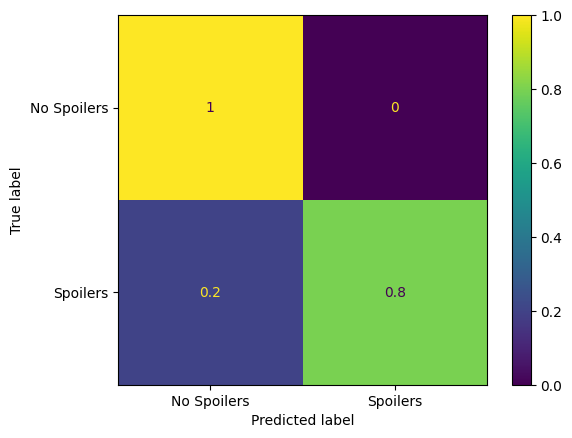

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Accuracy Score:", accuracy_score(y_train, yTrainHat))
cm = confusion_matrix(y_train,yTrainHat,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=
                              ['No Spoilers','Spoilers'])
disp.plot()

In [ ]:
#Performance on Test Set
yTestProbs = model.predict(X_test)
yTestHat = (yTestProbs>0.5)

375/375 [==============================] - 53s 141ms/step


Accuracy Score: 0.8543333333333333


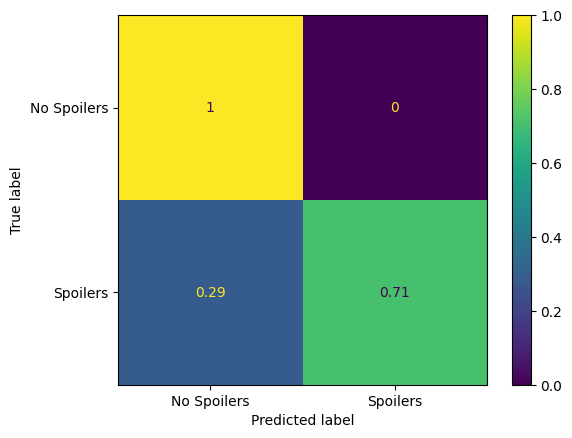

In [ ]:
cm = confusion_matrix(y_test,yTestHat,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=
                              ['No Spoilers','Spoilers'])
disp.plot()